# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG, display

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [5]:
n = 10

In [17]:
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position

In [7]:
image = svg_graph(adjacency, position, names=np.arange(n))

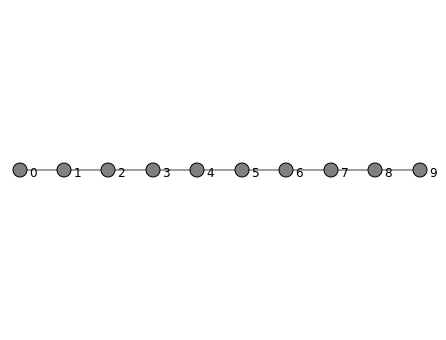

In [8]:
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [9]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [10]:
scores = pagerank.fit_transform(adjacency)

In [11]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)

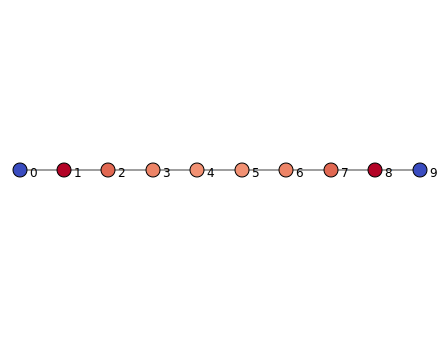

In [12]:
SVG(image)

In [19]:
top_k(scores, 2)

array([1, 8])

In [30]:
factor = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,0.9999999]
for i in factor:
    print("damping_factor:")
    print(i)
    pagerank = PageRank(damping_factor=i, solver='lanczos')
    scores = pagerank.fit_transform(adjacency)
    print(scores)
    #image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
    #display( SVG(image) )
    print(top_k(scores, 2))

damping_factor:
0
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0 1]
damping_factor:
0.1
[0.0952267  0.10453403 0.10022727 0.10001139 0.1000006  0.1000006
 0.10001139 0.10022727 0.10453403 0.0952267 ]
[1 8]
damping_factor:
0.2
[0.09082483 0.10824829 0.10083326 0.10008426 0.10000936 0.10000936
 0.10008426 0.10083326 0.10824829 0.09082483]
[1 8]
damping_factor:
0.3
[0.08668997 0.11126649 0.10172996 0.10026655 0.10004704 0.10004704
 0.10026655 0.10172996 0.11126649 0.08668997]
[1 8]
damping_factor:
0.4
[0.08273273 0.11366366 0.10285285 0.1006006  0.10015015 0.10015015
 0.1006006  0.10285285 0.11366366 0.08273273]
[8 1]
damping_factor:
0.5
[0.07886792 0.1154717  0.10415094 0.10113208 0.10037736 0.10037736
 0.10113208 0.10415094 0.1154717  0.07886792]
[1 8]
damping_factor:
0.6
[0.07500254 0.11667513 0.1055787  0.10192054 0.10082309 0.10082309
 0.10192054 0.1055787  0.11667513 0.07500254]
[1 8]
damping_factor:
0.7
[0.07101747 0.11719278 0.10708728 0.1030566  0.10164586 0.10164586
 0.1030566  0.

## Les Misérables


In [81]:
graph = miserables(True)

In [114]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [83]:
image = svg_graph(adjacency, position, names, scale=2)

## To do

* Show the graph with PageRank scores.<br>
**Hint:** Use the log of the scores for better visualization.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees,
    2. the 10 nodes of highest weights,
    3. the 10 most frequent nodes under neighbor sampling.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

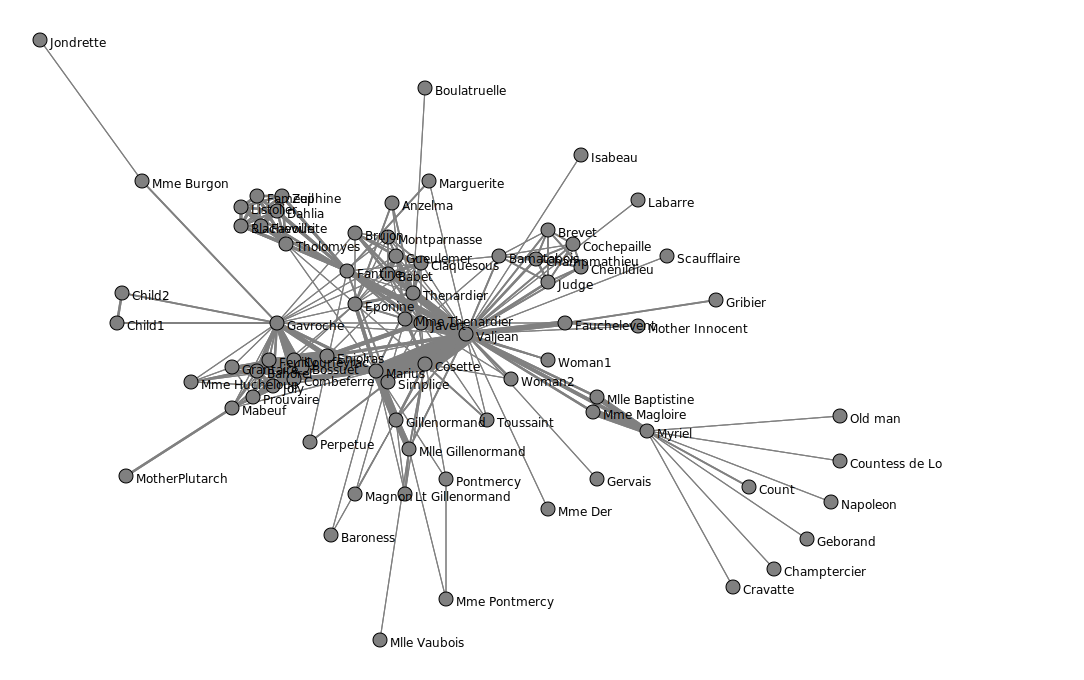

In [79]:
# 10 best ranked characters.
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
#top_k(scores, 2)

[11 55  0 26 58 25 62 48 23 27]
[0.09955811 0.05166811 0.03923158 0.03690957 0.0366168  0.0356823
 0.03299898 0.02830263 0.02716351 0.02682278]


In [87]:
image = svg_graph(adjacency, position, names, scale=2, scores=np.log(scores))
#, scores=np.log(scores)

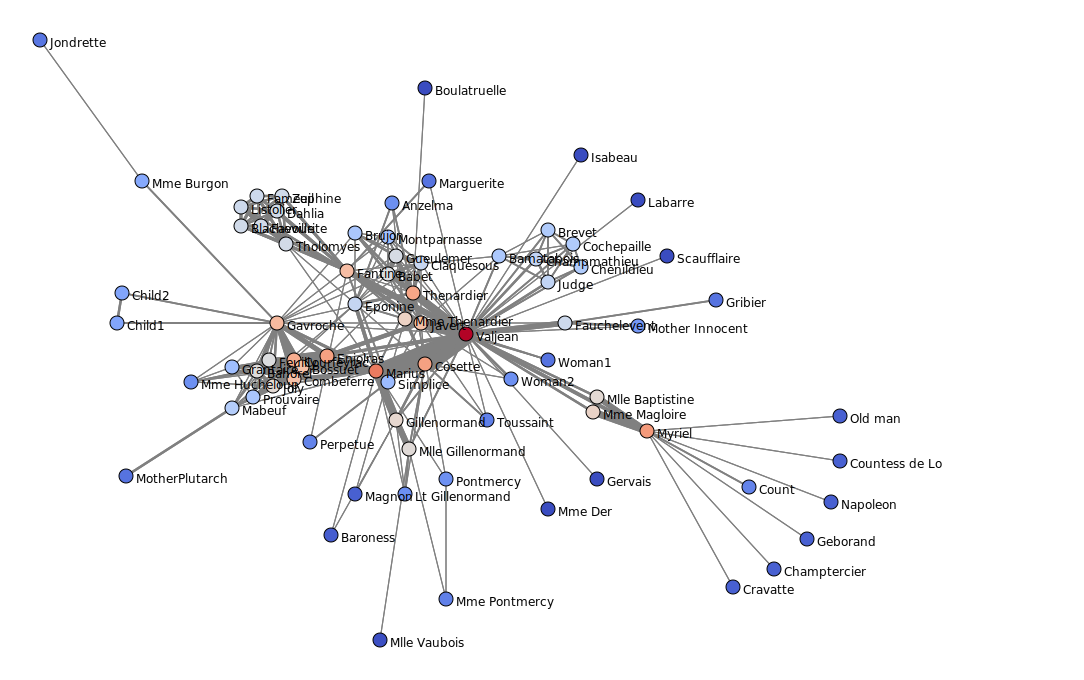

In [88]:
SVG(image)

In [94]:
# degrees
adjacency_array = adjacency.toarray()
adjacency_array_01 = adjacency_array != 0
degrees = np.dot(adjacency_array_01, np.ones(np.size(adjacency_array[0])))
scores_ordered_arg = np.argsort(degrees)[::-1]
print(scores_ordered_arg[:10])
scores_ordered = np.sort(degrees)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])

[11 48 55 27 25 23 58 62 64 63]
[36. 22. 19. 17. 16. 15. 15. 13. 13. 12.]
['Valjean' 'Gavroche' 'Marius' 'Javert' 'Thenardier' 'Fantine' 'Enjolras'
 'Courfeyrac' 'Bossuet' 'Bahorel']


In [95]:
# weights
adjacency_array = adjacency.toarray()
weights = np.dot(adjacency_array, np.ones(np.size(adjacency_array[0])))
scores_ordered_arg = np.argsort(weights)[::-1]
print(scores_ordered_arg[:10])
scores_ordered = np.sort(weights)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])

[11 55 58 62 26 59 64 25 48 27]
[158. 104.  91.  84.  68.  68.  66.  61.  56.  47.]
['Valjean' 'Marius' 'Enjolras' 'Courfeyrac' 'Cosette' 'Combeferre'
 'Bossuet' 'Thenardier' 'Gavroche' 'Javert']


In [119]:
#PI 1
P = normalize(adjacency)
size = P.shape[0]
ones = np.ones(size)
PI0 = ones/size
PI1 = (P.T.dot(PI0)).T
scores_ordered_arg = np.argsort(PI1)[::-1]
print(scores_ordered_arg[:10])
scores_ordered = np.sort(PI1)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])

[11  0 25 55 48 23 51 58 28 62]
[0.15240981 0.10426688 0.04500401 0.03944453 0.03482809 0.03305673
 0.03000139 0.02532324 0.02366116 0.02341233]
['Valjean' 'Myriel' 'Thenardier' 'Marius' 'Gavroche' 'Fantine'
 'Mlle Gillenormand' 'Enjolras' 'Fauchelevent' 'Courfeyrac']


In [97]:
print(np.size(adjacency[0]))

10


## Openflights


In [158]:
graph = openflights

In [160]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [136]:
# edges not displayed
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

In [138]:
#SVG(image)


## To do

* Show the same world map with PageRank scores.<br>
**Hint:** Display nodes in increasing order of scores using the parameter ``node_order`` for better visualization.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Show the world map with Personalized PageRank scores, starting from **Tokyo** international airport.
* List the corresponding 10 best ranked airports.

In [161]:
# 10 best ranked airports.
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])

[1782 1773  280 1857 1825  622  762 1986 1688  379]
[0.00514934 0.00472936 0.0044974  0.0043511  0.00429824 0.00418003
 0.00399975 0.00381312 0.00380083 0.00379097]
['Hartsfield Jackson Atlanta International Airport'
 'Dallas Fort Worth International Airport' 'Amsterdam Airport Schiphol'
 "Chicago O'Hare International Airport" 'Denver International Airport'
 'Charles de Gaulle International Airport' 'Atatürk International Airport'
 'Domodedovo International Airport' 'Los Angeles International Airport'
 'OR Tambo International Airport']


In [162]:
#image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
# Score : in the sens of pagerank
#
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False , node_order=scores_ordered_arg[::-1], scores = scores )

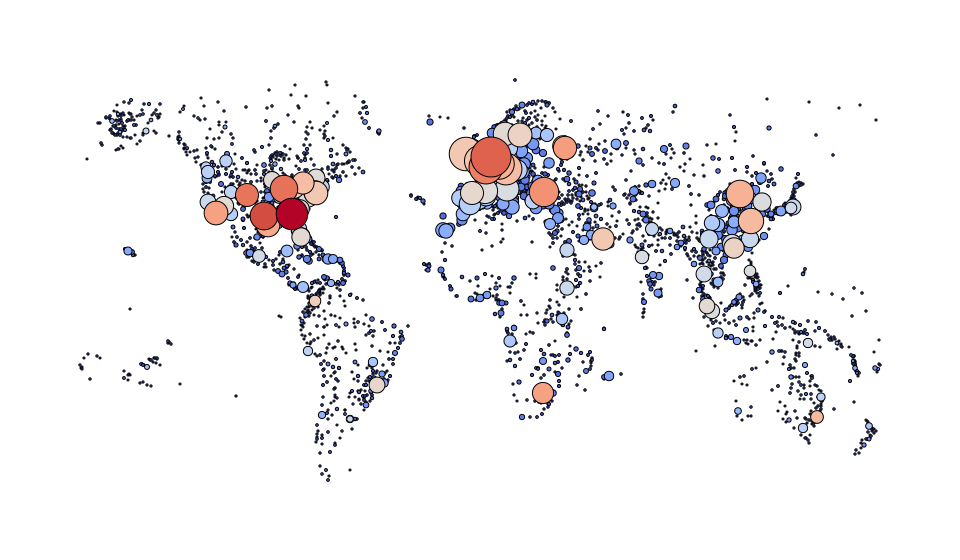

In [163]:
SVG(image)


In [164]:
# weights
adjacency_array = adjacency.toarray()
weights = np.dot(adjacency_array, np.ones(np.size(adjacency_array[0])))
scores_ordered_arg = np.argsort(weights)[::-1]
print(scores_ordered_arg[:10])
scores_ordered = np.sort(weights)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])


[ 280  622  286  194 1782  251  189  762 1773 1618]
[492. 413. 408. 386. 382. 376. 369. 354. 334. 332.]
['Amsterdam Airport Schiphol' 'Charles de Gaulle International Airport'
 'Dublin Airport' 'Munich International Airport'
 'Hartsfield Jackson Atlanta International Airport'
 'London Gatwick Airport' 'Frankfurt am Main International Airport'
 'Atatürk International Airport' 'Dallas Fort Worth International Airport'
 'Beijing Capital International Airport']


In [174]:
seeds = {i: name for i, name in enumerate(names) if 'Tokyo' in name}
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency, {1084:1})

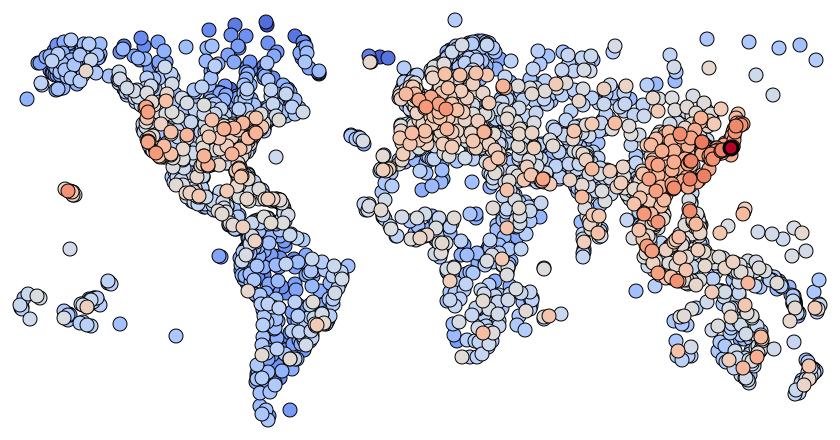

In [183]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=False, display_edges=False , node_order=scores_ordered_arg[::-1], scores = np.log(scores), seeds = seeds )
SVG(image)

In [175]:
# 10 best ranked airports.
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])

[1084 1914 1093 1038 1072 1655 1045 1956 1040 1618]
[0.19932469 0.01534278 0.01404919 0.01362123 0.01225088 0.01094844
 0.01067291 0.00970325 0.00933561 0.00889473]
['Tokyo Haneda International Airport' 'Incheon International Airport'
 'Naha Airport' 'Taiwan Taoyuan International Airport'
 'Osaka International Airport' 'Shanghai Pudong International Airport'
 'New Chitose Airport' 'Kansai International Airport'
 'Narita International Airport' 'Beijing Capital International Airport']


## 2. Digraphs

PageRank applies to directed graphs as well. In fact, it was originally designed for the Web graph, which is a directed graph.

## Wikipedia Vitals

In [6]:
graph = wikivitals

In [7]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [15]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])

[8527 2569 2155 8947 2722 2693 8758 2656 2721 3794  248 2703 2723 2748
 2741 2567 2657 2742 8744 2139]
[0.00405848 0.00211905 0.00175867 0.00166158 0.0015626  0.00155884
 0.00153005 0.00147322 0.0014398  0.00143138 0.0012327  0.00120246
 0.00117755 0.00112325 0.00110263 0.00108372 0.001068   0.00106551
 0.00106053 0.00100659]
['Bibliothèque nationale de France' 'United States'
 'Geographic coordinate system' 'The New York Times' 'France' 'India'
 'Latin' 'China' 'United Kingdom' 'World War II' 'Encyclopædia Britannica'
 'Russia' 'Germany' 'Australia' 'Italy' 'Canada' 'Japan' 'Spain'
 'Greek language' 'Europe']


In [16]:
print(adjacency.shape)

(10012, 10012)


In [17]:
out_degree = adjacency.dot(np.ones(adjacency.shape[0]))
in_degree = adjacency.T.dot(np.ones(adjacency.shape[1]))

print("out-degrees")
scores_ordered_arg = np.argsort(out_degree)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(out_degree)[::-1]
print(scores_ordered[:10])
print(names[scores_ordered_arg[:10]])

print("in-degrees")
scores_ordered_arg = np.argsort(in_degree)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(in_degree)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])

out-degrees
[2139 3335 3765 2722 2141 3968 2140 2703 3340 2144]
[664. 627. 627. 547. 525. 477. 471. 463. 452. 450.]
['Europe' 'History of the world' 'Modern history' 'France' 'Africa'
 'History of art' 'Asia' 'Russia' 'History of Europe' 'South America']
in-degrees
[8527 2569 2693 2656 8947 2722 2155 2721 3794 8758 2723 2703 2657 2741
 2748 2742 2567 2139  248 2619]
[3467. 1952. 1531. 1473. 1404. 1390. 1369. 1304. 1290. 1180. 1113. 1098.
 1062. 1057. 1042. 1021.  989.  980.  968.  951.]
['Bibliothèque nationale de France' 'United States' 'India' 'China'
 'The New York Times' 'France' 'Geographic coordinate system'
 'United Kingdom' 'World War II' 'Latin' 'Germany' 'Russia' 'Japan'
 'Italy' 'Australia' 'Spain' 'Canada' 'Europe' 'Encyclopædia Britannica'
 'Egypt']


## To do

* List the 20 closest pages to **Pablo Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In [11]:
#Pablo picasso
seeds = {i: name for i, name in enumerate(names) if 'Pablo Picasso' in name}
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
# index of pablo picasso : 4936
scores = pagerank.fit_transform(adjacency, {4936:1})

In [13]:
# 20 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])

[4936 8527 8947 3279  504   65  499  498  511  503  509 2742 2722   64
  510 2569 2155 4920 3794 4909]
[0.15135223 0.00688511 0.00256999 0.00233325 0.00207768 0.00187898
 0.00180801 0.00173216 0.00172505 0.00172405 0.00169129 0.00168958
 0.00168035 0.00167809 0.00164972 0.00163797 0.00160326 0.00159122
 0.00158715 0.00158453]
['Pablo Picasso' 'Bibliothèque nationale de France' 'The New York Times'
 'Paris' 'Modernism' 'Museum of Modern Art' 'Cubism' 'Avant-garde'
 'Symbolism (arts)' 'Impressionism' 'Romanticism' 'Spain' 'France'
 'Metropolitan Museum of Art' 'Surrealism' 'United States'
 'Geographic coordinate system' 'Vincent van Gogh' 'World War II'
 'Paul Cézanne']


In [20]:
#Cat
seeds = {i: name for i, name in enumerate(names) if 'Cat' in name}
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
# index of Cat : 1401
scores = pagerank.fit_transform(adjacency, {1401:1})

In [21]:
# 20 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])

[1401 8527  701  975 1378 8947 2723  994 3601 3521 2569 8758 1395 5554
 1492 6597 1390 1406 1389 1405]
[0.15088514 0.00371673 0.00245492 0.00239907 0.00220343 0.00215943
 0.00197919 0.00195228 0.00183207 0.0017767  0.00174907 0.00174795
 0.00170547 0.00168857 0.00166864 0.00164923 0.00163612 0.00162902
 0.00161372 0.00161182]
['Cat' 'Bibliothèque nationale de France' 'Taxonomy (biology)' 'Animal'
 'Mammal' 'The New York Times' 'Germany' 'Chordate' 'Middle Ages'
 'Roman Empire' 'United States' 'Latin' 'Dog' 'Aristotle' 'Pinniped'
 'Carl Linnaeus' 'Bear' 'Lion' 'Carnivora' 'Leopard']


In [24]:
#Dog
seeds = {i: name for i, name in enumerate(names) if 'Dog' in name}
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
# index of Dog : 1395
scores = pagerank.fit_transform(adjacency, {1395:1})

In [25]:
# 20 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])

[1395 8527  701  975 2693 2656 1378 2657  994  704 3601 6992 6993 1406
 2664 1492 1390 1393 1401 1391]
[0.15117109 0.00381582 0.00256952 0.00248899 0.00244207 0.00232783
 0.00227867 0.00206014 0.00200762 0.00190775 0.00187446 0.00184117
 0.00178617 0.00177693 0.00176694 0.00176319 0.00175961 0.00175543
 0.00175202 0.0017519 ]
['Dog' 'Bibliothèque nationale de France' 'Taxonomy (biology)' 'Animal'
 'India' 'China' 'Mammal' 'Japan' 'Chordate' 'Species' 'Middle Ages'
 'Christianity' 'Islam' 'Lion' 'Indonesia' 'Pinniped' 'Bear' 'Polar bear'
 'Cat' 'Brown bear']


## 3. Bigraphs

PageRank is less frequently used for bipartite graphs. It is very useful in this case as well.

## Cinema

In [5]:
graph = cinema

In [6]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* List the top-10 movies in terms of PageRank.
* List the 5 closest movies to **Mon Oncle**. 
* List the 5 closest actors to **Catherine Deneuve**.

In [8]:
pagerank = BiPageRank()

In [9]:
scores = pagerank.fit_transform(biadjacency)

In [10]:
# 20 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(movies[scores_ordered_arg[:20]])
#print(actors[scores_ordered_arg[:20]])

[78876 63636 82439 28790 29166 52580 61292 50512 57507  6684 49957 84466
 65196 41282 87955 71899 19969 39635 62825 58900]
[7.26516397e-05 7.23514978e-05 6.26198723e-05 5.95003297e-05
 5.87840575e-05 5.78579441e-05 5.72846933e-05 5.70208811e-05
 5.62781028e-05 5.50629761e-05 5.39375354e-05 5.37808688e-05
 5.33862049e-05 5.29762432e-05 5.11592667e-05 5.09518646e-05
 5.05481362e-05 5.03613800e-05 5.00409463e-05 4.92023891e-05]
['The Walking Dead (TV series)' 'Tatort' 'Twin Peaks'
 'Homeland (TV series)' 'House of Cards (U.S. TV series)' 'Prêt-à-Porter'
 'St. Elsewhere' 'Peaky Blinders (TV series)' 'Seances'
 'Arrow (TV series)' 'Paramount on Parade' 'Vikings (TV series)'
 'The Banquet (1991 film)' 'Many Kisses Later' 'Ziegfeld Follies'
 'The Last Judgment (1961 film)' 'Dune' 'Lucky Stars' 'Suyamvaram'
 'Short Cuts']


In [7]:
#Mon Oncle
seeds = {i: name for i, name in enumerate(movies) if 'Mon Oncle' in name}
pagerank = BiPageRank(damping_factor=0.85, solver="lanczos")
#pagerank = PageRank(damping_factor=0.85, solver='lanczos')
# index of Mon Oncle : 43428
scores = pagerank.fit_transform(biadjacency, {43428:1})

In [9]:
# 10 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
print(movies[scores_ordered_arg[:10]])

[43428 33108 24403 15612 81605 67984 73553 37657 23008 38914]
[0.41741986 0.15476651 0.13991986 0.13991986 0.01683763 0.01605725
 0.01604692 0.01484664 0.00223722 0.00119886]
['Mon Oncle' 'Jour de fête' 'Gai dimanche' 'Cours du soir'
 'Touchez pas au grisbi' 'The Discreet Charm of the Bourgeoisie'
 'The Milky Way (1969 film)' 'Les Amants du pont Saint-Jean'
 'Five Red Tulips' 'Los Olvidados']


In [10]:
#Catherine Deneuve
seeds = {i: name for i, name in enumerate(actors) if 'Catherine Deneuve' in name}
pagerank = BiPageRank(damping_factor=0.85, solver="lanczos")
#pagerank = PageRank(damping_factor=0.85, solver='lanczos')
# index of Catherine Deneuve : 2173
scores = pagerank.fit_transform(biadjacency, seeds_col={2173:1})

In [14]:
scores = pagerank.scores_col_
# 10 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
print(actors[scores_ordered_arg[:10]])

[ 2173   167   307  4172  2873  5727 10390  2665  7779  1186]
[0.38199834 0.01024999 0.00939037 0.0085003  0.00687077 0.00553232
 0.00508963 0.00492401 0.00484186 0.00440758]
['Catherine Deneuve' 'Marcello Mastroianni' 'Gérard Depardieu'
 'Michel Piccoli' 'Chiara Mastroianni' 'John Malkovich'
 'Jean-Louis Trintignant' 'Jacques Perrin' 'Alain Delon'
 'Danielle Darrieux']


In [16]:
test = biadjacency.toarray

## 4. Digraphs as bigraphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [15]:
graph = wikivitals

In [16]:
adjacency = graph.adjacency
names = graph.names

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.

## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In your opinion, what is the best algorithm for content recommendation, PageRank or BiPageRank?<br>
Justify your answer.

In [ ]:
seeds = {i: name for i, name in enumerate(actors) if 'Catherine Deneuve' in name}
pagerank = BiPageRank(damping_factor=0.85, solver="lanczos")
#pagerank = PageRank(damping_factor=0.85, solver='lanczos')
# index of Catherine Deneuve : 2173
scores = pagerank.fit_transform(biadjacency, seeds_col={2173:1})

In [17]:
seeds = {i: name for i, name in enumerate(names) if 'Pablo Picasso' in name}
pagerank = BiPageRank(damping_factor=0.85, solver='lanczos')
# index of pablo picasso : 4936
scores = pagerank.fit_transform(adjacency, {4936:1})

In [18]:
# 20 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])


[4936  504  499  492  503  494  510  502  511  501  517  498  500  514
 4925  507 5193   20 5190  327]
[0.28165944 0.00414206 0.00375541 0.00370276 0.00354078 0.00353826
 0.00352847 0.00346738 0.00344371 0.00344107 0.00343607 0.003428
 0.00341222 0.00340163 0.00340162 0.00339489 0.00338338 0.00336965
 0.00334511 0.00332768]
['Pablo Picasso' 'Modernism' 'Cubism' 'Modern art' 'Impressionism'
 'Abstract expressionism' 'Surrealism' 'Futurism' 'Symbolism (arts)'
 'Expressionism' 'Pop art' 'Avant-garde' 'Dada' 'Minimalism' 'Paul Klee'
 'Postmodernism' 'Thomas Mann' 'Modern architecture' 'Franz Kafka'
 '20th-century classical music']
